In [334]:
import yfinance as yf

In [335]:
sp500 = yf.download("^GSPC", start="1928-01-01", end="2024-01-01")
sp500.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [336]:
sp500.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,0


In [337]:
# Remove MultiIndex by keeping only the first level (Price)
sp500.columns = sp500.columns.droplevel(1)


In [338]:
import pandas as pd 
file="C:\\Users\\Hp\\sp500.csv"
sp500=pd.read_csv(file)

In [339]:
# Reset the entire index (removes any multi-level index)
sp500= sp500.reset_index(drop=True)

In [340]:
print(sp500.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [341]:
sp500.shape

(24114, 6)

<Axes: >

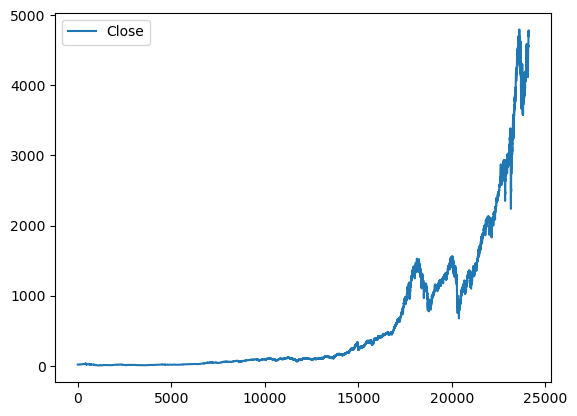

In [342]:
sp500.plot.line(y="Close",use_index=True)

In [343]:
#removing unwanted Columns 
#del sp500["Dividends"]
#del sp500["Stock Splits"]

In [344]:
sp500

,Date,Close,High,Low,Open,Volume
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,0
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,0
...,...,...,...,...,...,...
24109,2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3046770000
24110,2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2513910000
24111,2023-12-27,4781.580078,4785.390137,4768.899902,4773.450195,2748450000
24112,2023-12-28,4783.350098,4793.299805,4780.979980,4786.439941,2698860000


In [345]:
#when We predicting the SP500 Value from today prices
#from those we predict next day Closing price 
#So we adding new coloumn as Tomorrow as next day Close Price
sp500["Tomorrow"]=sp500["Close"].shift(-1)

In [346]:
sp500


,Date,Close,High,Low,Open,Volume,Tomorrow
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,0,17.370001
...,...,...,...,...,...,...,...
24109,2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3046770000,4774.750000
24110,2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2513910000,4781.580078
24111,2023-12-27,4781.580078,4785.390137,4768.899902,4773.450195,2748450000,4783.350098
24112,2023-12-28,4783.350098,4793.299805,4780.979980,4786.439941,2698860000,4769.830078


In [347]:
sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [348]:
sp500.head()

,Date,Close,High,Low,Open,Volume,Tomorrow,Target
0,1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1,1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
2,1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
3,1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
4,1928-01-09,17.500000,17.500000,17.500000,17.500000,0,17.370001,0


In [352]:
sp500['Date']

0       1928-01-03
1       1928-01-04
2       1928-01-05
3       1928-01-06
4       1928-01-09
           ...    
24109   2023-12-22
24110   2023-12-26
24111   2023-12-27
24112   2023-12-28
24113   2023-12-29
Name: Date, Length: 24114, dtype: datetime64[ns]

In [354]:
# Ensure the 'Date' column is in datetime format
sp500['Date'] = pd.to_datetime(sp500['Date'], errors='coerce')

# Filter the data for rows after 1990-01-01
sp500_filtered = sp500[sp500['Date'] > '1990-01-01']

# Check the result
print(sp500_filtered)

# Save the filtered data to a CSV file
# sp500_filtered.to_csv("sp500_filtered_after_1990.csv", index=False)


            Date        Close         High          Low         Open  \
15549 1990-01-02   359.690002   359.690002   351.980011   353.399994   
15550 1990-01-03   358.760010   360.589996   357.890015   359.690002   
15551 1990-01-04   355.670013   358.760010   352.890015   358.760010   
15552 1990-01-05   352.200012   355.670013   351.350006   355.670013   
15553 1990-01-08   353.790009   354.239990   350.540009   352.200012   
...          ...          ...          ...          ...          ...   
24109 2023-12-22  4754.629883  4772.939941  4736.770020  4753.919922   
24110 2023-12-26  4774.750000  4784.720215  4758.450195  4758.859863   
24111 2023-12-27  4781.580078  4785.390137  4768.899902  4773.450195   
24112 2023-12-28  4783.350098  4793.299805  4780.979980  4786.439941   
24113 2023-12-29  4769.830078  4788.430176  4751.990234  4782.879883   

           Volume     Tomorrow  Target  
15549   162070000   358.760010       0  
15550   192330000   355.670013       0  
15551   1770

In [356]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
train = sp500.iloc[:-100]
test=sp500.iloc[-100:]

predictors=["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [357]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])

In [358]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [361]:
import pandas as pd
preds=pd.Series(preds,index=test.index)

In [363]:
precision_score(test["Target"],preds)

0.5263157894736842

In [364]:
combined=pd.concat([test["Target"],preds],axis=1)

<Axes: >

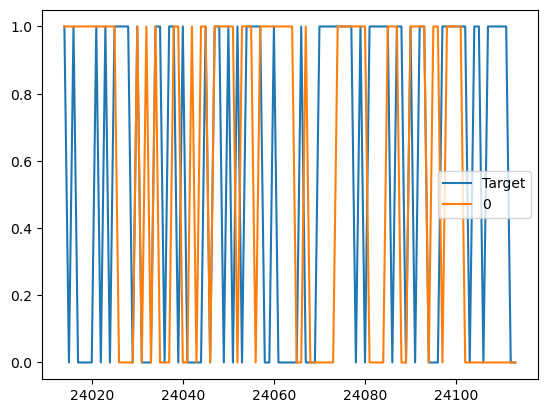

In [366]:
combined.plot()

In [368]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined


In [369]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [370]:
predictions=backtest(sp500,model,predictors)


In [372]:
predictions["Predictions"].value_counts()

Predictions
0    12280
1     9334
Name: count, dtype: int64

In [374]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5182129847868009

In [378]:
y=sp500["Date"]
sp500 = sp500.drop('Date', axis=1)

In [379]:
horizons = [2, 5, 250, 1000]
new_predictors = []

for horizon in horizons:
    # Calculate rolling averages
    rolling_averages = sp500.rolling(horizon).mean()

    # Create ratio column
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    # Create trend column (shift by 1 and then calculate rolling sum)
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500["Target"].shift(1).rolling(horizon).sum()

    # Add new columns to the predictor list
    new_predictors += [ratio_column, trend_column]




In [380]:
sp500

,Close,High,Low,Open,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
0,17.760000,17.760000,17.760000,17.760000,0,17.719999,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.719999,17.719999,17.719999,17.719999,0,17.549999,0,0.998873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.549999,17.549999,17.549999,17.549999,0,17.660000,1,0.995180,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,17.660000,17.660000,17.660000,17.660000,0,17.500000,0,1.003124,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,17.500000,17.500000,17.500000,17.500000,0,17.370001,0,0.995449,1.0,0.992176,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24109,4754.629883,4772.939941,4736.770020,4753.919922,3046770000,4774.750000,1,1.000829,2.0,1.002720,4.0,1.113889,135.0,1.199129,529.0
24110,4774.750000,4784.720215,4758.450195,4758.859863,2513910000,4781.580078,1,1.002111,2.0,1.005513,4.0,1.117612,136.0,1.203740,529.0
24111,4781.580078,4785.390137,4768.899902,4773.450195,2748450000,4783.350098,1,1.000715,2.0,1.006392,4.0,1.118166,137.0,1.204993,530.0
24112,4783.350098,4793.299805,4780.979980,4786.439941,2698860000,4769.830078,0,1.000185,2.0,1.003175,5.0,1.117603,137.0,1.204974,530.0


In [381]:
sp500=sp500.dropna()

In [382]:
sp500

,Close,High,Low,Open,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1000,8.100000,8.100000,8.100000,8.100000,0,8.120000,1,1.008717,2.0,1.019381,3.0,0.593657,105.0,0.401432,521.0
1001,8.120000,8.120000,8.120000,8.120000,0,7.560000,0,1.001233,2.0,1.017544,4.0,0.596489,105.0,0.402615,522.0
1002,7.560000,7.560000,7.560000,7.560000,0,7.550000,0,0.964286,1.0,0.956962,3.0,0.556754,104.0,0.375034,522.0
1003,7.550000,7.550000,7.550000,7.550000,0,8.080000,1,0.999338,0.0,0.960804,3.0,0.557255,104.0,0.374726,521.0
1004,8.080000,8.080000,8.080000,8.080000,0,8.220000,1,1.033909,1.0,1.025121,3.0,0.597812,104.0,0.401219,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24108,4746.750000,4748.709961,4708.350098,4724.290039,3431180000,4754.629883,1,1.005124,1.0,1.002557,3.0,1.112992,135.0,1.197601,528.0
24109,4754.629883,4772.939941,4736.770020,4753.919922,3046770000,4774.750000,1,1.000829,2.0,1.002720,4.0,1.113889,135.0,1.199129,529.0
24110,4774.750000,4784.720215,4758.450195,4758.859863,2513910000,4781.580078,1,1.002111,2.0,1.005513,4.0,1.117612,136.0,1.203740,529.0
24111,4781.580078,4785.390137,4768.899902,4773.450195,2748450000,4783.350098,1,1.000715,2.0,1.006392,4.0,1.118166,137.0,1.204993,530.0


In [383]:
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [384]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict_proba(test[predictors])[:,1]
    preds[preds>= 0.6]=1
    preds[preds< 0.6]=0
    preds=pd.Series(preds,index=test.index,name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined


In [385]:
predictions=backtest(sp500,model,new_predictors)

In [386]:
predictions["Predictions"].value_counts()

Predictions
0.0    17493
1.0     3120
Name: count, dtype: int64

In [387]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5878205128205128